In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [3]:
df=pd.read_csv('cubic_zirconia (3).csv')

Data Dictionary:

Carat - Carat weight of the cubic zirconia.

Cut - Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color - Colour of the cubic zirconia.With D being the worst and J the best.

Clarity - Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, 
VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

Depth - The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table - The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price - the Price of the cubic zirconia.

X - Length of the cubic zirconia in mm.

Y - Width of the cubic zirconia in mm.

Z - Height of the cubic zirconia in mm.

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26957,26958,2.09,Premium,H,SI2,60.6,59.0,8.27,8.22,5.00,17805
26958,26959,1.37,Premium,E,SI2,61.0,57.0,7.25,7.19,4.40,6751
26959,26960,1.05,Very Good,E,SI2,63.2,59.0,6.43,6.36,4.04,4281
26960,26961,1.10,Very Good,D,SI2,NaN,63.0,6.76,6.69,3.94,4361
26961,26962,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,NaN,NaN,NaN,13484.0,7784.846691,1.0,6742.5,13484.0,20225.5,26967.0
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8


In [8]:
df.shape

(26967, 11)

In [9]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [10]:
for column in df.columns:
    if df[column].dtype == 'float64':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()  

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [12]:
num=df.select_dtypes(include=np.number)

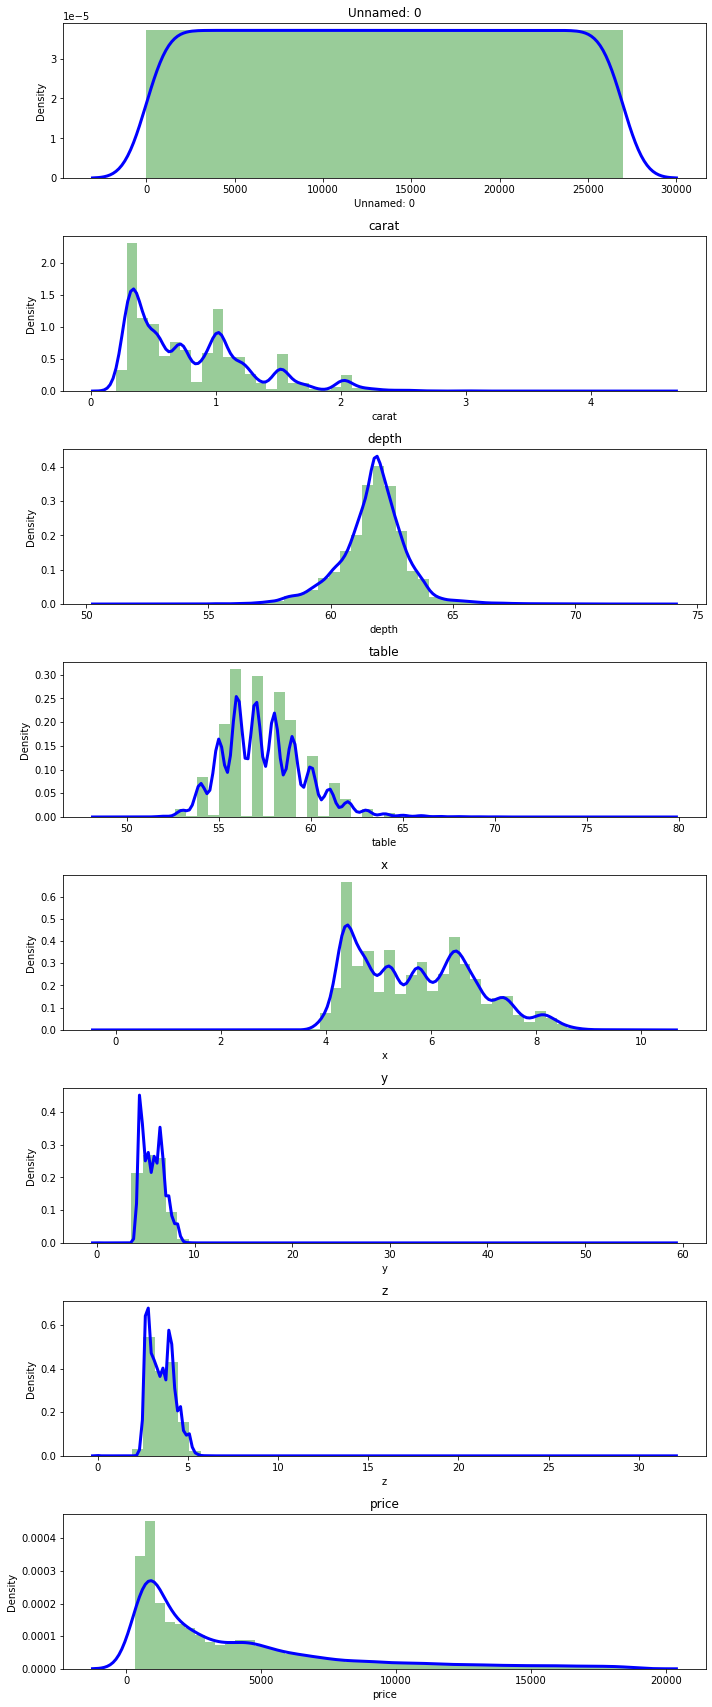

In [13]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 


plt.figure(figsize=(10,50))
for i in range(len(num.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(num[num.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(num.columns[i])

plt.tight_layout()

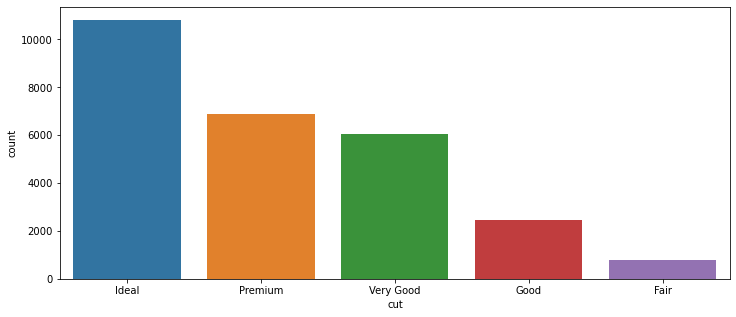

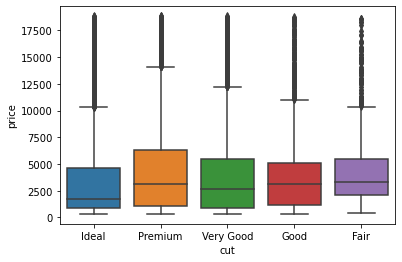

In [14]:
# BarPlot for Categorical columns 'CUT'.

plt.figure(figsize = (12,5))
sns.countplot('cut',data = df, order = df['cut'].value_counts().index)
plt.show()

sns.boxplot(x = df['cut'],
            y = df['price']);

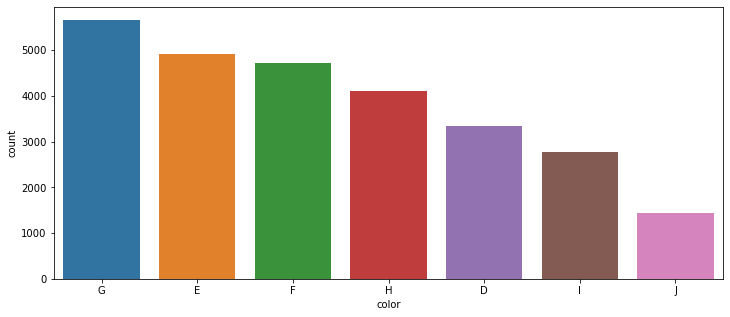

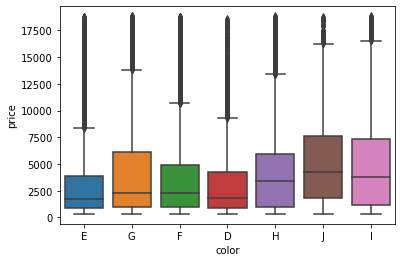

In [15]:
# BarPlot for categorical columns 'Color'.

plt.figure(figsize = (12,5))
sns.countplot('color',data = df, order = df['color'].value_counts().index)
plt.show()

sns.boxplot(x = df['color'],
            y = df['price']);

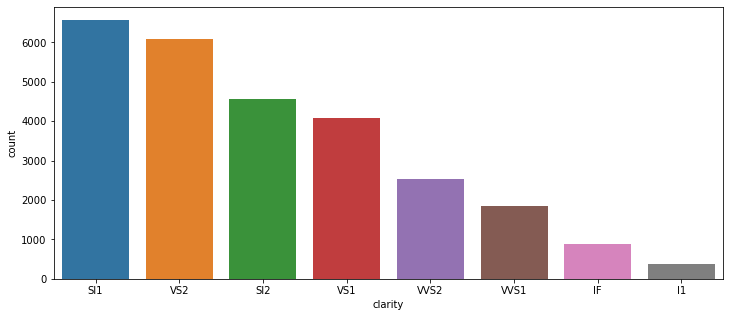

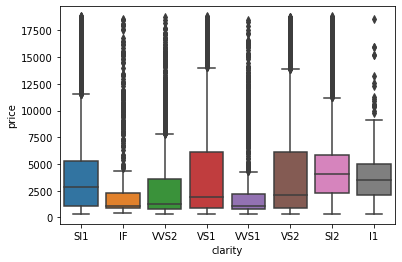

In [16]:
# Bar Plot for categorical columns 'Clarity'.

plt.figure(figsize = (12,5))
sns.countplot('clarity',data = df, order = df['clarity'].value_counts().index)
plt.show()

sns.boxplot(x = df['clarity'],
            y = df['price']);

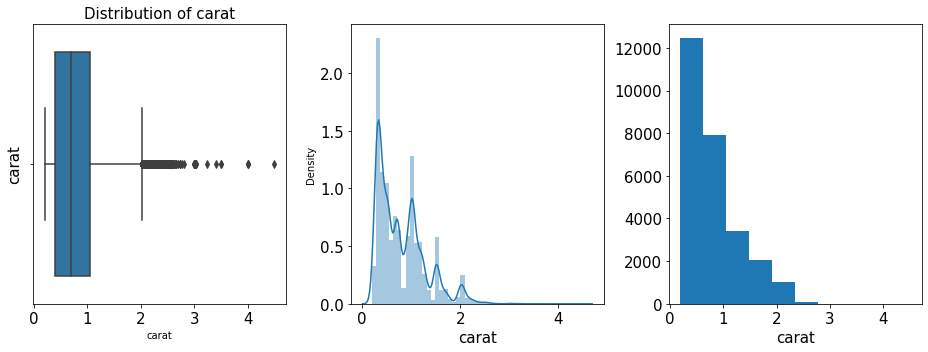

In [17]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='carat',data=df,orient='v',ax=ax1)
ax1.set_ylabel('carat', fontsize=15)
ax1.set_title('Distribution of carat', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['carat'],ax=ax2)
ax2.set_xlabel('carat', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['carat'])
ax3.set_xlabel('carat', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

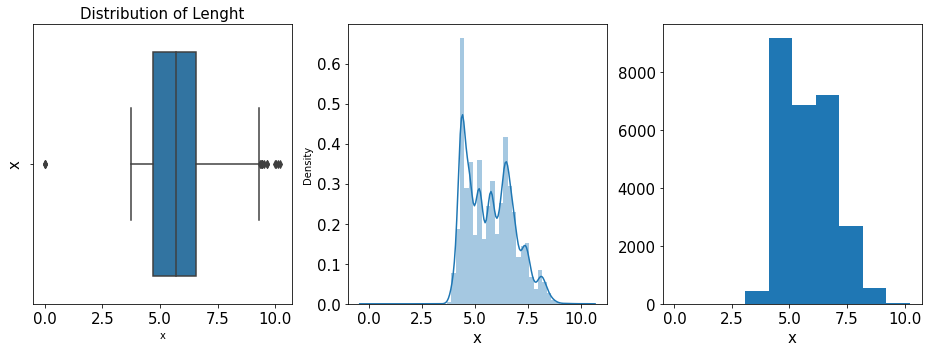

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='x',data=df,orient='v',ax=ax1)
ax1.set_ylabel('x', fontsize=15)
ax1.set_title('Distribution of Lenght', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['x'],ax=ax2)
ax2.set_xlabel('x', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['x'])
ax3.set_xlabel('x', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

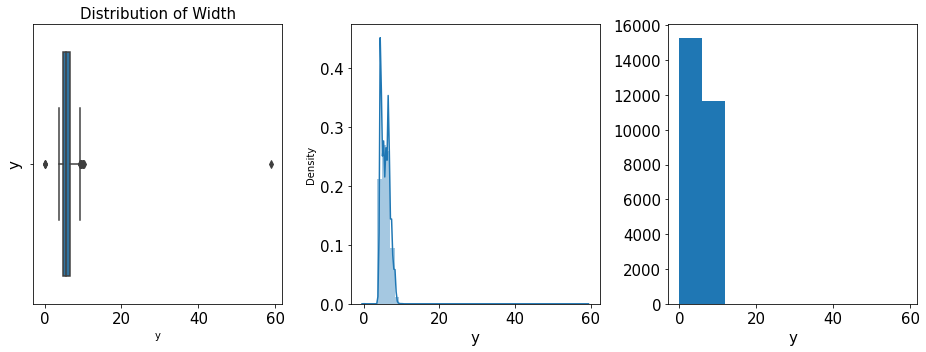

In [19]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='y',data=df,orient='v',ax=ax1)
ax1.set_ylabel('y', fontsize=15)
ax1.set_title('Distribution of Width', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['y'],ax=ax2)
ax2.set_xlabel('y', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['y'])
ax3.set_xlabel('y', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

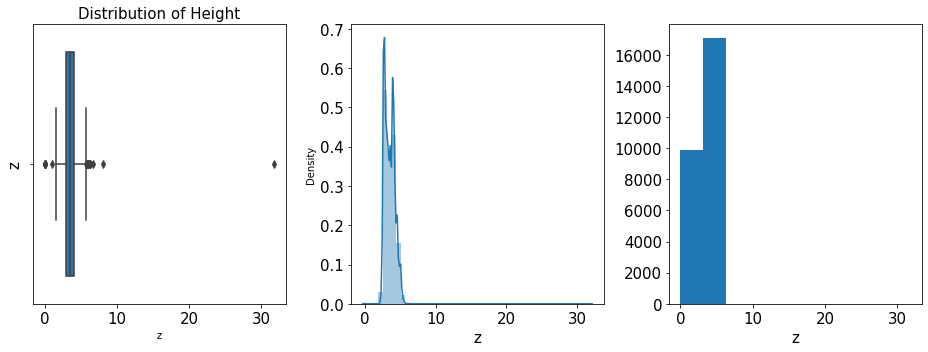

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='z',data=df,orient='v',ax=ax1)
ax1.set_ylabel('z', fontsize=15)
ax1.set_title('Distribution of Height', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['z'],ax=ax2)
ax2.set_xlabel('z', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['z'])
ax3.set_xlabel('z', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

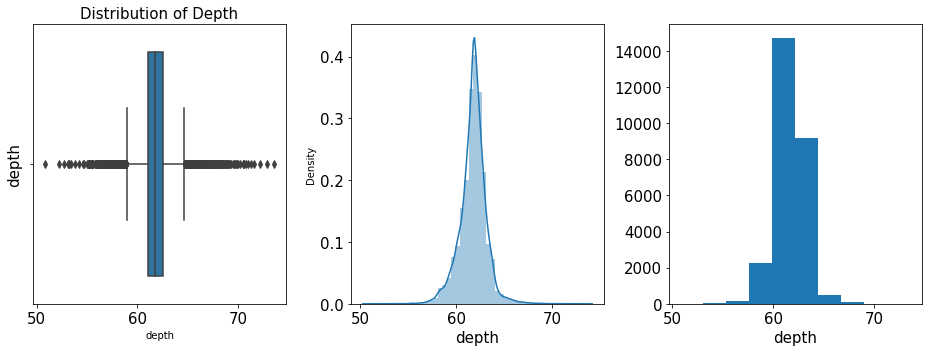

In [21]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='depth',data=df,orient='v',ax=ax1)
ax1.set_ylabel('depth', fontsize=15)
ax1.set_title('Distribution of Depth', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['depth'],ax=ax2)
ax2.set_xlabel('depth', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['depth'])
ax3.set_xlabel('depth', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

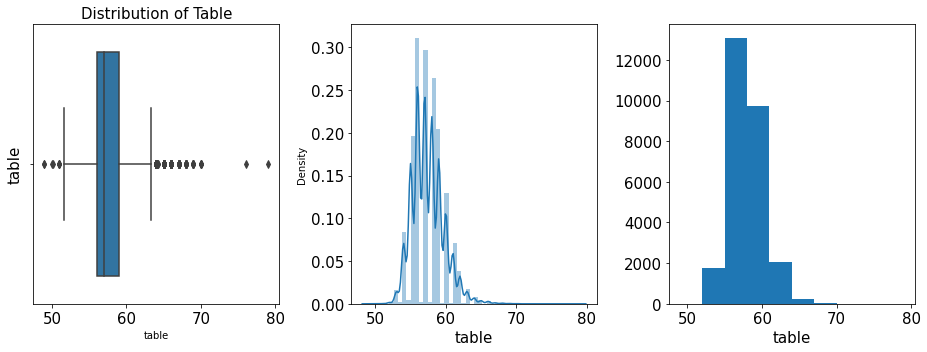

In [22]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='table',data=df,orient='v',ax=ax1)
ax1.set_ylabel('table', fontsize=15)
ax1.set_title('Distribution of Table', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['table'],ax=ax2)
ax2.set_xlabel('table', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['table'])
ax3.set_xlabel('table', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

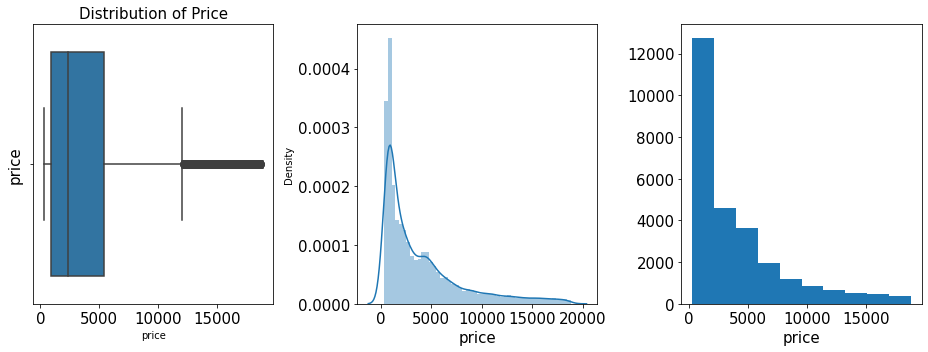

In [23]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='price',data=df,orient='v',ax=ax1)
ax1.set_ylabel('price', fontsize=15)
ax1.set_title('Distribution of Price', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['price'],ax=ax2)
ax2.set_xlabel('price', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['price'])
ax3.set_xlabel('price', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [24]:
#correlation matrix

df.corr().T

,Unnamed: 0,carat,depth,table,x,y,z,price
Unnamed: 0,1.000000,0.003490,-0.001582,0.003817,0.004626,0.006844,0.001681,0.002650
carat,0.003490,1.000000,0.034895,0.181685,0.976368,0.941071,0.940640,0.922416
depth,-0.001582,0.034895,1.000000,-0.293958,-0.018431,-0.024399,0.097413,-0.002519
table,0.003817,0.181685,-0.293958,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.004626,0.976368,-0.018431,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.006844,0.941071,-0.024399,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.001681,0.940640,0.097413,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.002650,0.922416,-0.002519,0.126942,0.886247,0.856243,0.850536,1.000000


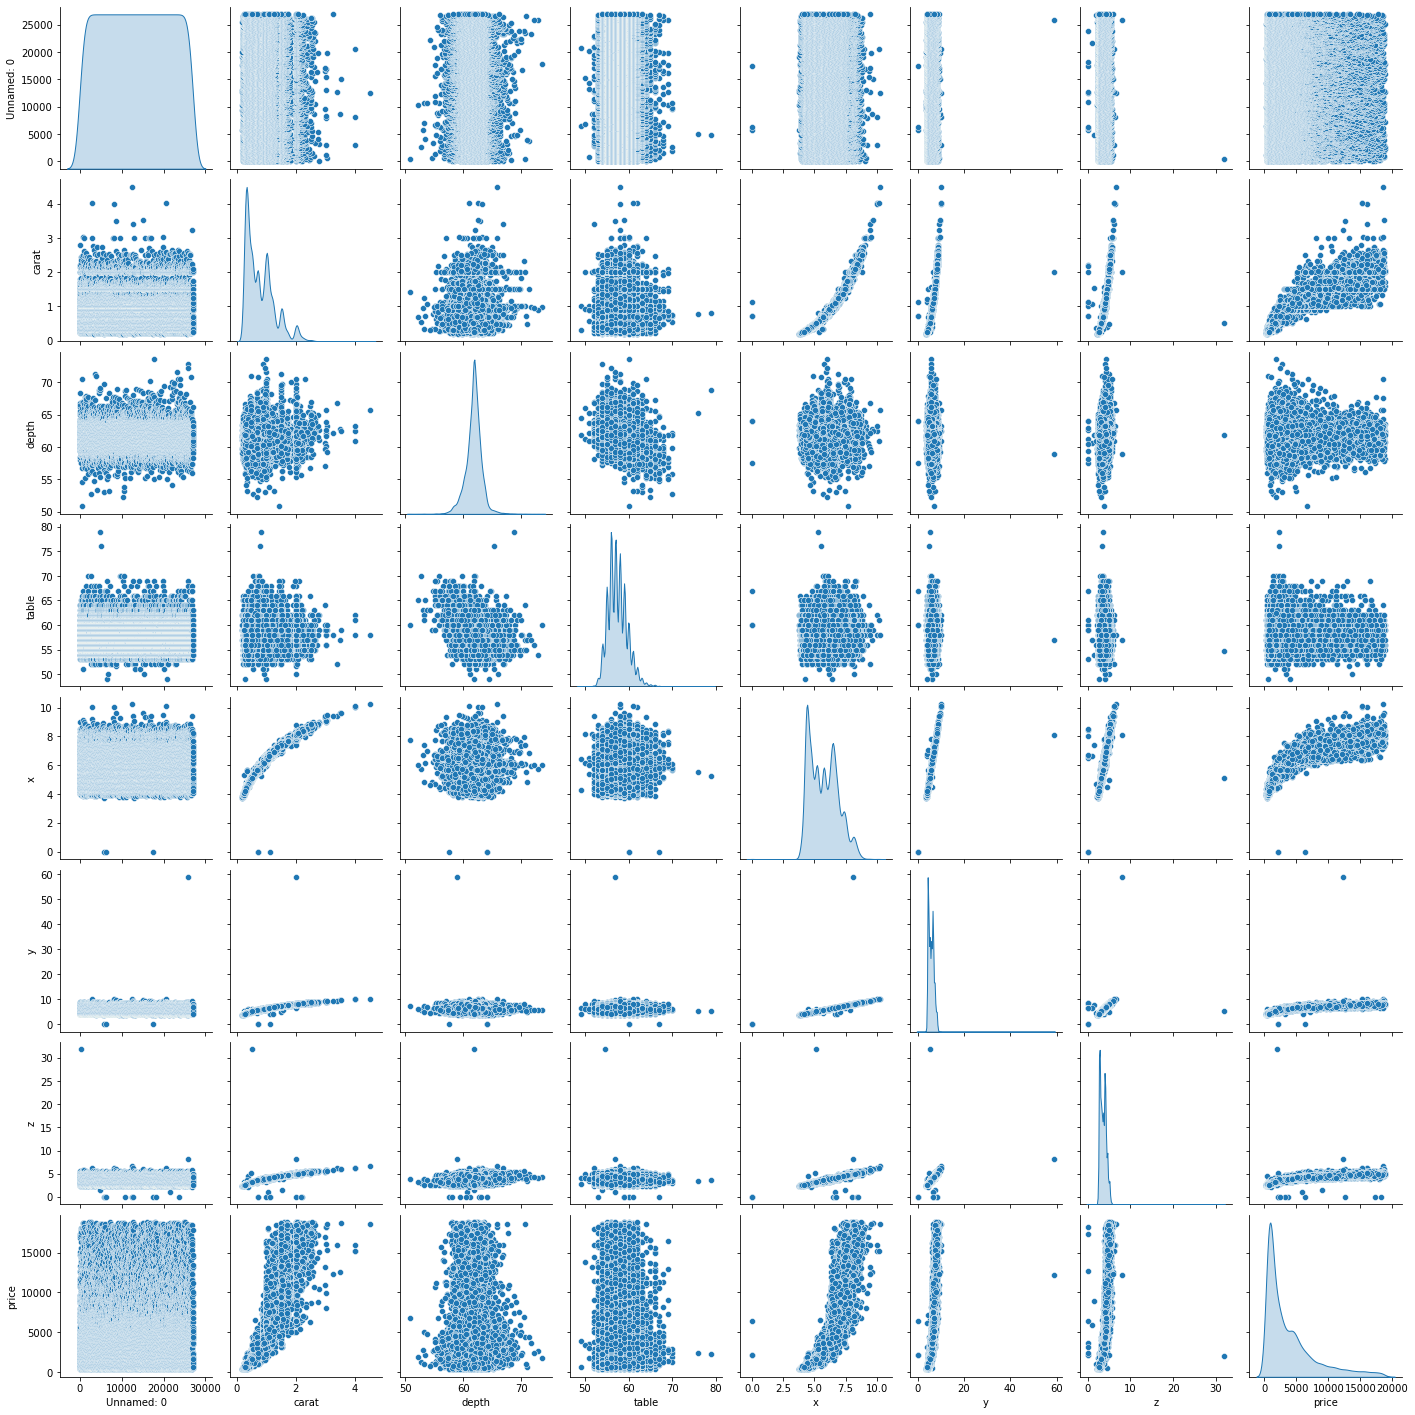

In [25]:
sns.pairplot(df,diag_kind='kde');

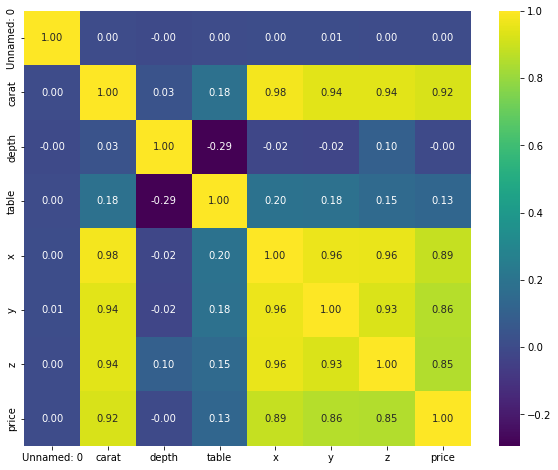

In [26]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

In [27]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
carat x         0.976368
y     x         0.962715
x     z         0.956606
carat y         0.941071
z     carat     0.940640
y     z         0.928923
price carat     0.922416
      x         0.886247
      y         0.856243
      z         0.850536

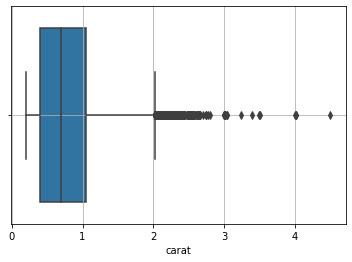

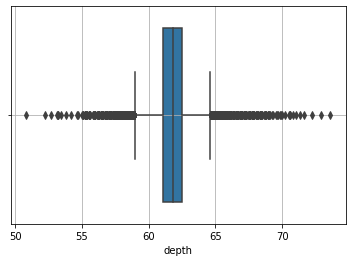

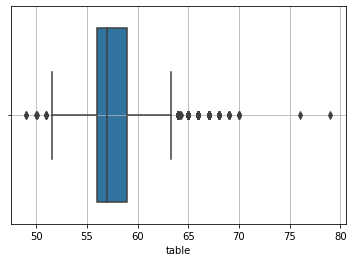

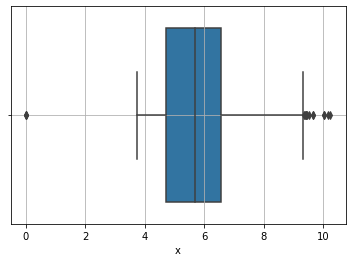

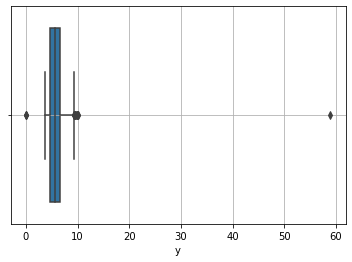

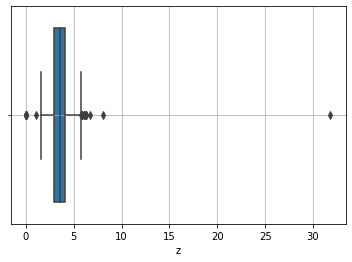

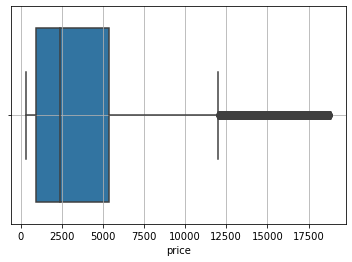

In [28]:
cont_cols = ['carat','depth','table','x','y','z','price']
for i in cont_cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [30]:
lr,ur=remove_outlier(df['carat'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['carat']=np.where(df['carat']>ur,ur,df['carat'])
df['carat']=np.where(df['carat']<lr,lr,df['carat'])
print('')

lr,ur=remove_outlier(df['depth'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['depth']=np.where(df['depth']>ur,ur,df['depth'])
df['depth']=np.where(df['depth']<lr,lr,df['depth'])
print('')

lr,ur=remove_outlier(df['table'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['table']=np.where(df['table']>ur,ur,df['table'])
df['table']=np.where(df['table']<lr,lr,df['table'])
print('')

lr,ur=remove_outlier(df['x'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['x']=np.where(df['x']>ur,ur,df['x'])
df['x']=np.where(df['x']<lr,lr,df['x'])
print('')

lr,ur=remove_outlier(df['y'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['y']=np.where(df['y']>ur,ur,df['y'])
df['y']=np.where(df['y']<lr,lr,df['y'])
print('')

lr,ur=remove_outlier(df['z'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['z']=np.where(df['z']>ur,ur,df['z'])
df['z']=np.where(df['z']<lr,lr,df['z'])
print('')

lr,ur=remove_outlier(df['price'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['price']=np.where(df['price']>ur,ur,df['price'])
df['price']=np.where(df['price']<lr,lr,df['price'])
print('')

Lower Range : -0.5750000000000001 
Upper Range : 2.0250000000000004

Lower Range : 59.0 
Upper Range : 64.6

Lower Range : 51.5 
Upper Range : 63.5

Lower Range : 1.9500000000000002 
Upper Range : 9.309999999999999

Lower Range : 1.9649999999999999 
Upper Range : 9.285

Lower Range : 1.1899999999999997 
Upper Range : 5.75

Lower Range : -5677.5 
Upper Range : 11982.5



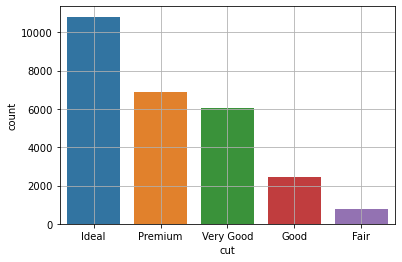

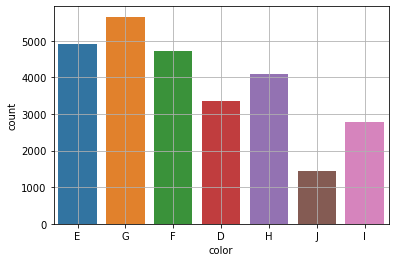

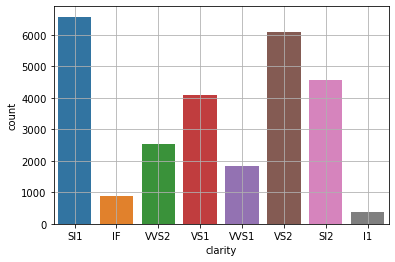

In [31]:
cols = ['cut','color','clarity']
for i in cols:
    sns.countplot(df[i])
    plt.grid()
    plt.show();

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [32]:
## We are coding up the 'cut' variable in an ordinal manner
df['cut']=np.where(df['cut']=='Ideal','2',df['cut'])
df['cut']=np.where(df['cut']=='Premium','2',df['cut'])

df['cut']=np.where(df['cut']=='Good','1',df['cut'])
df['cut']=np.where(df['cut']=='Very Good','1',df['cut'])

df['cut']=np.where(df['cut']=='Fair','0',df['cut'])

In [33]:
df['clarity'].value_counts()

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

In [34]:
df['cut'].value_counts()

2    17715
1     8471
0      781
Name: cut, dtype: int64

In [35]:
df['color'].value_counts()

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

In [36]:
df['clarity']=np.where(df['clarity']=='I1','Best',df['clarity'])

df['clarity']=np.where(df['clarity']=='SI1','VGood',df['clarity'])
df['clarity']=np.where(df['clarity']=='SI2','VGood',df['clarity'])

df['clarity']=np.where(df['clarity']=='VS1','Good',df['clarity'])
df['clarity']=np.where(df['clarity']=='VS2','Good',df['clarity'])


df['clarity']=np.where(df['clarity']=='VVS1','Bad',df['clarity'])
df['clarity']=np.where(df['clarity']=='VVS2','Bad',df['clarity'])

df['clarity']=np.where(df['clarity']=='IF','Worst',df['clarity'])

In [37]:
df['color']=np.where(df['color']=='J','Best',df['color'])

df['color']=np.where(df['color']=='I','VGood',df['color'])
df['color']=np.where(df['color']=='H','VGood',df['color'])

df['color']=np.where(df['color']=='G','Good',df['color'])
df['color']=np.where(df['color']=='F','Good',df['color'])

df['color']=np.where(df['color']=='E','Bad',df['color'])

df['color']=np.where(df['color']=='D','Worst',df['color'])

In [38]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,2,Bad,VGood,62.1,58.0,4.27,4.29,2.66,499.0
1,2,0.33,2,Good,Worst,60.8,58.0,4.42,4.46,2.70,984.0
2,3,0.90,1,Bad,Bad,62.2,60.0,6.04,6.12,3.78,6289.0
3,4,0.42,2,Good,Good,61.6,56.0,4.82,4.80,2.96,1082.0
4,5,0.31,2,Good,Bad,60.4,59.0,4.35,4.43,2.65,779.0


In [39]:
df['clarity']=np.where(df['clarity']=='Best','4',df['clarity'])

df['clarity']=np.where(df['clarity']=='VGood','3',df['clarity'])
df['clarity']=np.where(df['clarity']=='VGood','3',df['clarity'])

df['clarity']=np.where(df['clarity']=='Good','2',df['clarity'])
df['clarity']=np.where(df['clarity']=='Good','2',df['clarity'])


df['clarity']=np.where(df['clarity']=='Bad','1',df['clarity'])
df['clarity']=np.where(df['clarity']=='Bad','1',df['clarity'])

df['clarity']=np.where(df['clarity']=='Worst','0',df['clarity'])

In [40]:
df['color']=np.where(df['color']=='Best','4',df['color'])

df['color']=np.where(df['color']=='VGood','3',df['color'])
df['color']=np.where(df['color']=='VGood','3',df['color'])

df['color']=np.where(df['color']=='Good','2',df['color'])
df['color']=np.where(df['color']=='Good','2',df['color'])

df['color']=np.where(df['color']=='Bad','1',df['color'])

df['color']=np.where(df['color']=='Worst','0',df['color'])

In [41]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,2,1,3,62.1,58.0,4.27,4.29,2.66,499.0
1,2,0.33,2,2,0,60.8,58.0,4.42,4.46,2.70,984.0
2,3,0.90,1,1,1,62.2,60.0,6.04,6.12,3.78,6289.0
3,4,0.42,2,2,2,61.6,56.0,4.82,4.80,2.96,1082.0
4,5,0.31,2,2,1,60.4,59.0,4.35,4.43,2.65,779.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26967 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.3+ MB


In [43]:
df['cut'] = df['cut'].astype('int64')
df['color'] = df['color'].astype('int64')
df['clarity'] = df['clarity'].astype('int64')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  int64  
 3   color       26967 non-null  int64  
 4   clarity     26967 non-null  int64  
 5   depth       26967 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 2.3 MB


In [45]:
data_df_dummy = pd.get_dummies(df, columns=['clarity'])

In [46]:
data_df_dummy.head()

,Unnamed: 0,carat,cut,color,depth,table,x,y,z,price,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4
0,1,0.30,2,1,62.1,58.0,4.27,4.29,2.66,499.0,0,0,0,1,0
1,2,0.33,2,2,60.8,58.0,4.42,4.46,2.70,984.0,1,0,0,0,0
2,3,0.90,1,1,62.2,60.0,6.04,6.12,3.78,6289.0,0,1,0,0,0
3,4,0.42,2,2,61.6,56.0,4.82,4.80,2.96,1082.0,0,0,1,0,0
4,5,0.31,2,2,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0


In [47]:
data_df_dummy.shape

(26967, 15)

1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [48]:
X=data_df_dummy.drop('price',axis=1)
Y=data_df_dummy[['price']]

In [49]:
X.head()

,Unnamed: 0,carat,cut,color,depth,table,x,y,z,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4
0,1,0.30,2,1,62.1,58.0,4.27,4.29,2.66,0,0,0,1,0
1,2,0.33,2,2,60.8,58.0,4.42,4.46,2.70,1,0,0,0,0
2,3,0.90,1,1,62.2,60.0,6.04,6.12,3.78,0,1,0,0,0
3,4,0.42,2,2,61.6,56.0,4.82,4.80,2.96,0,0,1,0,0
4,5,0.31,2,2,60.4,59.0,4.35,4.43,2.65,0,1,0,0,0


In [50]:
Y.head()

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0


In [51]:
# Split X and Y into 70 :30 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

# Linear Regression Model


In [52]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [53]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Unnamed: 0 is -0.0008370386126985373
The coefficient for carat is 8782.177275134714
The coefficient for cut is 201.1223070100075
The coefficient for color is -387.6017703644944
The coefficient for depth is -16.372438547858835
The coefficient for table is -27.269938876843067
The coefficient for x is -1655.8883169939995
The coefficient for y is 1381.5181090240353
The coefficient for z is -179.62163974421003
The coefficient for clarity_0 is 1378.8846200790526
The coefficient for clarity_1 is 1145.237811545719
The coefficient for clarity_2 is 543.6537849180328
The coefficient for clarity_3 is -414.0958054185935
The coefficient for clarity_4 is -2653.6804111242077


In [54]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1762.6856057203763


In [55]:
# R square on training data
regression_model.score(X_train, Y_train)

0.9304166207495378

In [56]:
# R square on testing data
regression_model.score(X_test, Y_test)

0.9287574892898742

In [57]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

917.54368090779

In [58]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

921.6956535140038

### Linear Regression using statsmodels

In [59]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, Y_train], axis=1)
data_test=pd.concat([X_test,Y_test],axis=1)
data_train.head()

,Unnamed: 0,carat,cut,color,depth,table,x,y,z,clarity_0,clarity_1,clarity_2,clarity_3,clarity_4,price
11687,11688,0.41,2,3,62.3,56.0,4.77,4.73,2.96,0,1,0,0,0,1061.0
9728,9729,1.71,2,4,62.8,57.0,7.58,7.55,4.75,0,0,0,1,0,6320.0
1936,1937,0.33,1,2,61.8,62.0,4.40,4.45,2.74,0,0,0,1,0,536.0
26220,26221,0.70,1,3,62.8,57.0,5.61,5.66,3.54,0,0,0,1,0,2214.0
18445,18446,0.70,2,0,62.1,56.0,5.67,5.71,3.53,0,0,0,1,0,2575.0


In [60]:
data_train.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'depth', 'table', 'x', 'y', 'z',
       'clarity_0', 'clarity_1', 'clarity_2', 'clarity_3', 'clarity_4',
       'price'],
      dtype='object')

In [61]:
expr= 'price ~ carat+ cut+ color +depth + table+ x+ y+ z+ clarity_0+ clarity_1 + clarity_2+ clarity_3 + clarity_4'

In [62]:
 import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    1458.652958
carat        8782.247707
cut           201.136202
color        -387.629544
depth         -16.324547
table         -27.297628
x           -1655.518991
y            1381.306603
z            -180.003696
clarity_0    1670.787013
clarity_1    1436.981433
clarity_2     835.345980
clarity_3    -122.262864
clarity_4   -2362.198604
dtype: float64

In [63]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.102e+04
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:27:06   Log-Likelihood:            -1.5555e+05
No. Observations:               18876   AIC:                         3.111e+05
Df Residuals:                   18863   BIC:                         3.112e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1458.6530    559.614      2.607      0.0

In [64]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [65]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

917.5667264501532

In [66]:
np.sqrt(lm1.mse_resid) 

917.8828562533132

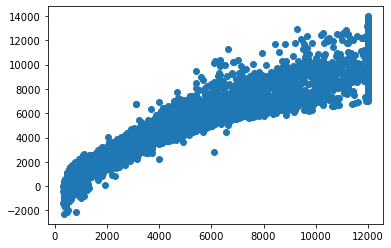

In [67]:
# Prediction on Test data
Y_pred = lm1.predict(data_test)
plt.scatter(Y_test['price'],Y_pred )
plt.show()

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [70]:
i=0
for column in X.columns:
    if i < 14:
        print (column ,"--->",  vif[i])
        i = i+1

Unnamed: 0 ---> 1.0001748568553082
carat ---> 31.392220533269956
cut ---> 1.3045707582728843
color ---> 1.1017012209134378
depth ---> 2.7699757701965835
table ---> 1.3676556841678607
x ---> 398.19882450933216
y ---> 381.79105964877124
z ---> 105.0958802721011
clarity_0 ---> 351.0795175992706
clarity_1 ---> 1717.894689813529
clarity_2 ---> 4019.6687624756264
clarity_3 ---> 4407.7603017311385
clarity_4 ---> 145.35472739031238


In [71]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(1458.65) * Intercept + (8782.25) * carat + (201.14) * cut + (-387.63) * color + (-16.32) * depth + (-27.3) * table + (-1655.52) * x + (1381.31) * y + (-180.0) * z + (1670.79) * clarity_0 + (1436.98) * clarity_1 + (835.35) * clarity_2 + (-122.26) * clarity_3 + (-2362.2) * clarity_4 + 

1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

Data Dictionary:

Holiday_Package - Opted for Holiday Package yes/no?

Salary - Employee salary

age - Age in years

edu - Years of formal education

no_young_children - The number of young children (younger than 7 years)

no_older_children - Number of older children

foreign - foreigner Yes/No

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

In [73]:
df1=pd.read_csv('Holiday_Package (2).csv')

In [74]:
df1.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [75]:
df1.drop('Unnamed: 0', inplace=True, axis=1)

In [76]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [78]:
df1.shape

(872, 7)

In [79]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df1.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [81]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [82]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print(feature)
        print(df1[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




Univariate Analysis of Continuous and Categorical variables
Checking the spread of the data using boxplot for the continuous variables.

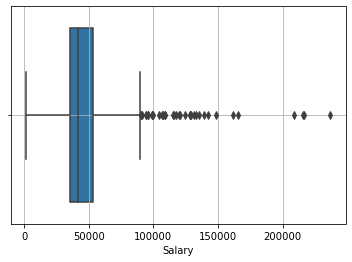

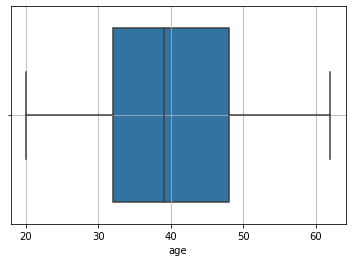

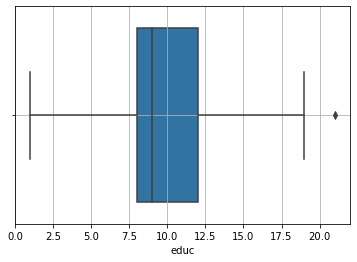

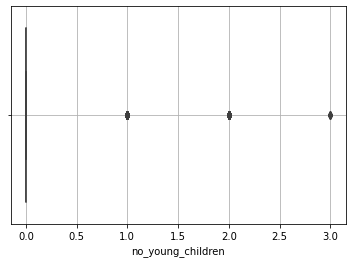

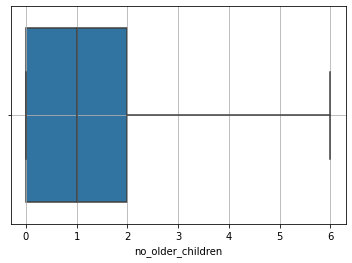

In [83]:
continous_cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in continous_cols:
    sns.boxplot(df1[i],whis=2.0)
    plt.grid()
    plt.show();

In [84]:
# Since there are outliers in the continous variable will impute only salary with median and rest like no of younger children and edu is kept as the same as the no of outliers is not many.

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [85]:
lr,ur=remove_outlier(df1['Salary'])
print('Lower Range of Salary :',lr,'\nUpper Range of Salary :',ur)
df1['Salary']=np.where(df1['Salary']>ur,ur,df1['Salary'])
df1['Salary']=np.where(df1['Salary']<lr,lr,df1['Salary'])

Lower Range of Salary : 8105.75 
Upper Range of Salary : 80687.75


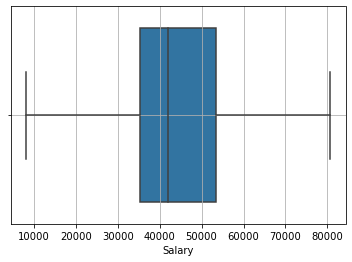

In [86]:
sns.boxplot(df1['Salary'],whis=2.0)
plt.grid()
plt.show()

Checking the spread of the data using countplot for the categorical variables and the Target varibles.

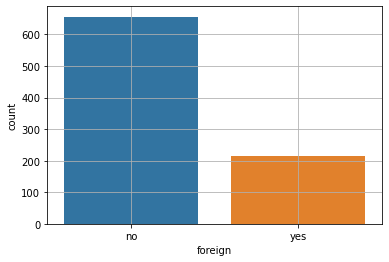

In [87]:
sns.countplot(df1['foreign'])
plt.grid()
plt.show()

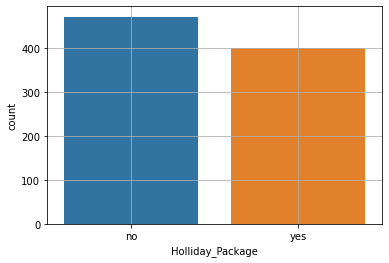

In [88]:
sns.countplot(df1['Holliday_Package'])
plt.grid()
plt.show()

Bivarate Analysis with Target Varible
Salary against Holiday_Package

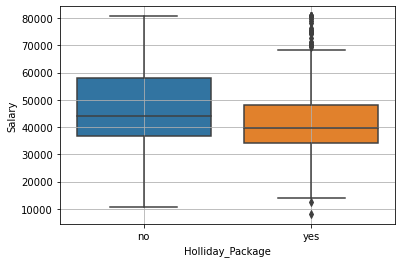

In [89]:
sns.boxplot(df1['Holliday_Package'],df1['Salary'])
plt.grid()
plt.show()

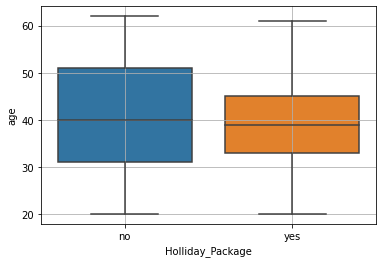

In [90]:
##age against Holiday_Package
sns.boxplot(df1['Holliday_Package'],df1['age'])
plt.grid()
plt.show()

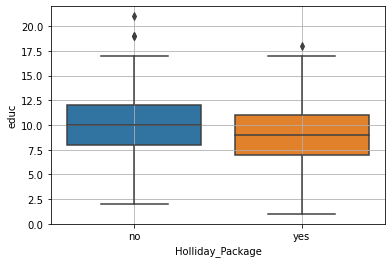

In [91]:
sns.boxplot(df1['Holliday_Package'],df1['educ'])
plt.grid()
plt.show()

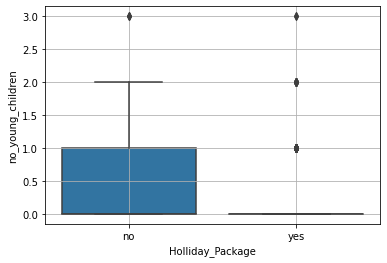

In [92]:
##no_young_children Vs Holiday_Package
sns.boxplot(df1['Holliday_Package'],df1['no_young_children'])
plt.grid()
plt.show()

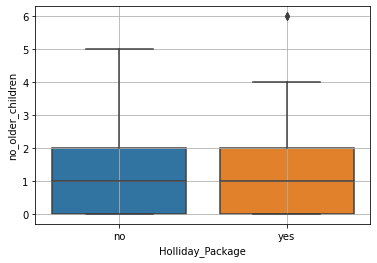

In [93]:
###no_older_children Vs Holiday_Package
sns.boxplot(df1['Holliday_Package'],df1['no_older_children'])
plt.grid()
plt.show()

In [94]:
### foreign Vs Holiday_Package

<function matplotlib.pyplot.show(close=None, block=None)>

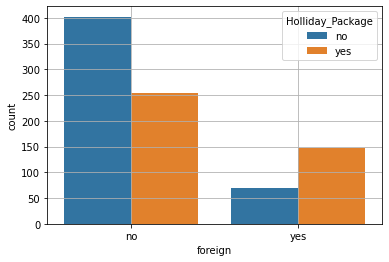

In [95]:
sns.countplot(df1['foreign'],hue=df1['Holliday_Package'])
plt.grid()
plt.show

In [96]:
### Converting the Target Variable into Categorical

In [97]:
df1['Holliday_Package'] = pd.Categorical(df1['Holliday_Package']).codes

In [98]:
df1['Holliday_Package'].value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    object 
dtypes: float64(1), int64(4), int8(1), object(1)
memory usage: 41.9+ KB


In [100]:
# Creating the dummy variables for foregin variable.

df2 = pd.get_dummies(df1, columns=['foreign'],drop_first=True)

In [101]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [102]:
### Checking for Correlations.

df2.corr()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
Holliday_Package,1.000000,-0.180214,-0.092311,-0.102552,-0.173115,0.080286,0.254096
Salary,-0.180214,1.000000,0.047029,0.352726,-0.034360,0.121993,-0.239387
age,-0.092311,0.047029,1.000000,-0.149294,-0.519093,-0.116205,-0.107148
educ,-0.102552,0.352726,-0.149294,1.000000,0.098350,-0.036321,-0.419678
no_young_children,-0.173115,-0.034360,-0.519093,0.098350,1.000000,-0.238428,0.085111
no_older_children,0.080286,0.121993,-0.116205,-0.036321,-0.238428,1.000000,0.021317
foreign_yes,0.254096,-0.239387,-0.107148,-0.419678,0.085111,0.021317,1.000000


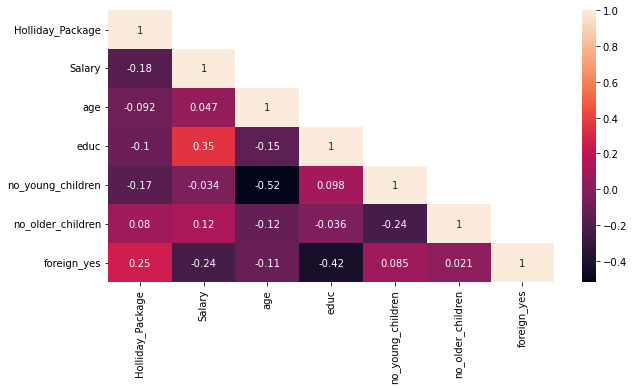

In [103]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True,mask=np.triu(df2.corr(),+1));

In [104]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Holliday_Package,872.0,0.459862,0.498672,0.00,0.0,0.0,1.0,1.00
Salary,872.0,45608.336869,15699.745151,8105.75,35324.0,41903.5,53469.5,80687.75
age,872.0,39.955275,10.551675,20.00,32.0,39.0,48.0,62.00
educ,872.0,9.307339,3.036259,1.00,8.0,9.0,12.0,21.00
no_young_children,872.0,0.311927,0.612870,0.00,0.0,0.0,0.0,3.00
no_older_children,872.0,0.982798,1.086786,0.00,0.0,1.0,2.0,6.00
foreign_yes,872.0,0.247706,0.431928,0.00,0.0,0.0,0.0,1.00


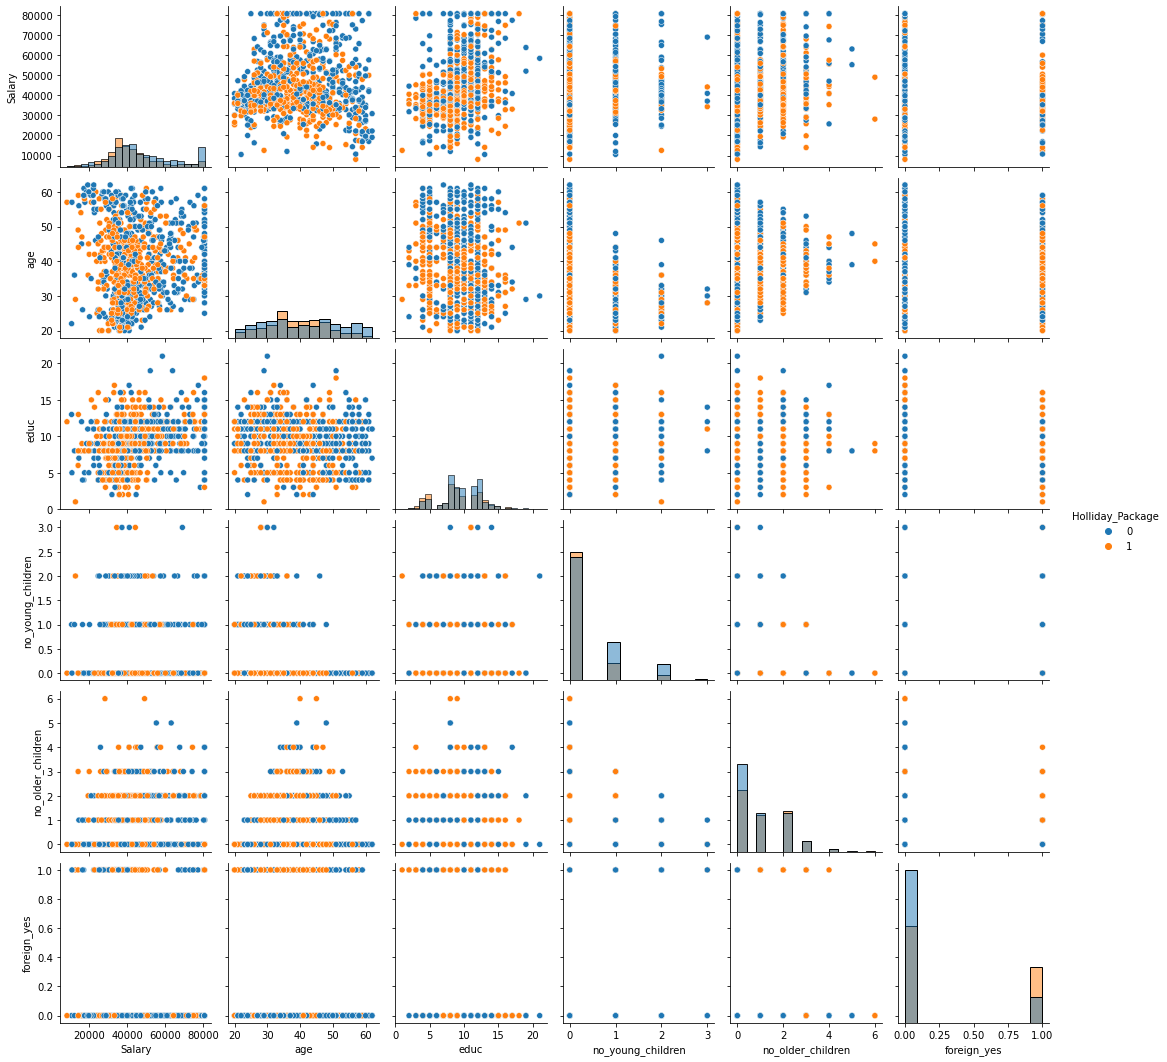

In [105]:
# Pairplot using sns
sns.pairplot(df2 ,diag_kind='hist' ,hue='Holliday_Package');

In [106]:
## Split the Data

X= df2.drop('Holliday_Package',axis=1)
Y=df2['Holliday_Package']

In [107]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,48412.0,30,8,1,1,0
1,37207.0,45,8,0,1,0
2,58022.0,46,9,0,0,0
3,66503.0,31,11,2,0,0
4,66734.0,44,12,0,2,0


In [108]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: Holliday_Package, dtype: int8

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1,stratify=df1['Holliday_Package'])

In [110]:
Y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [111]:
Y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

In [112]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [113]:
## Predicting on Training and Test dataset

Ytrain_predict = model.predict(X_train)
Ytest_predict = model.predict(X_test)

In [114]:
X_train

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
821,38974.0,47,12,0,2,1
805,40270.0,33,8,2,0,1
322,32573.0,30,11,1,0,0
701,43839.0,43,11,0,1,1
773,33060.0,40,5,1,1,1
...,...,...,...,...,...,...
594,42369.0,47,9,0,1,0
297,44207.0,45,12,0,2,0
76,50291.0,34,10,0,2,0
831,33434.0,44,7,0,1,1


In [115]:
X_test

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
264,25118.0,58,8,0,0,0
189,40913.0,20,9,1,0,0
643,28446.0,58,8,0,0,0
65,36072.0,35,4,0,2,0
241,52736.0,40,10,0,3,0
...,...,...,...,...,...,...
165,34878.0,29,14,1,1,0
100,61159.0,38,10,0,3,0
503,41167.0,44,9,0,2,0
431,41769.0,43,9,0,0,0


In [116]:
Ytrain_predict

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [117]:
Ytest_predict

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

In [118]:
### Getting the Predicted Classes and Probs

In [119]:
Ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.677850,0.322150
1,0.534541,0.465459
2,0.691849,0.308151
3,0.487796,0.512204
4,0.571939,0.428061


In [120]:
## Linear Discriminant Analysis

print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [121]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [122]:
#Prediction with Train and Test data

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [123]:
X_train

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
821,38974.0,47,12,0,2,1
805,40270.0,33,8,2,0,1
322,32573.0,30,11,1,0,0
701,43839.0,43,11,0,1,1
773,33060.0,40,5,1,1,1
...,...,...,...,...,...,...
594,42369.0,47,9,0,1,0
297,44207.0,45,12,0,2,0
76,50291.0,34,10,0,2,0
831,33434.0,44,7,0,1,1


In [124]:
X_test

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
264,25118.0,58,8,0,0,0
189,40913.0,20,9,1,0,0
643,28446.0,58,8,0,0,0
65,36072.0,35,4,0,2,0
241,52736.0,40,10,0,3,0
...,...,...,...,...,...,...
165,34878.0,29,14,1,1,0
100,61159.0,38,10,0,3,0
503,41167.0,44,9,0,2,0
431,41769.0,43,9,0,0,0


In [125]:
pred_class_train

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [126]:
pred_class_test


array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [127]:
# Logistic Regression Model Model Evaluation


# Accuracy - Training Data
model.score(X_train, Y_train)

0.6622950819672131

AUC: 0.731


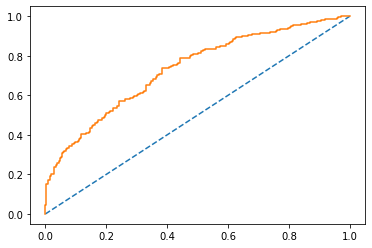

In [128]:
## AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [129]:
# Accuracy - Test Data
model.score(X_test, Y_test)

0.648854961832061

AUC: 0.731


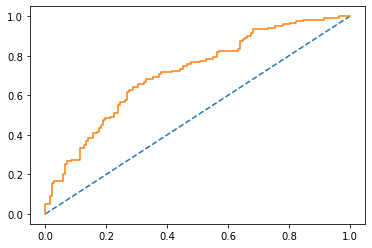

In [130]:
## AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [131]:
## Confusion Matrix for the training data
confusion_matrix(Y_train, Ytrain_predict)


array([[244,  85],
       [118, 163]], dtype=int64)

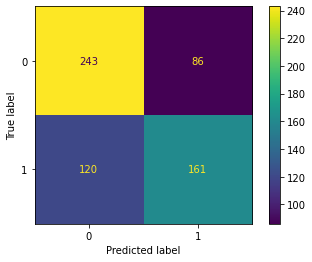

In [132]:
plot_confusion_matrix(model,X_train,Y_train);

In [133]:
print(classification_report(Y_train, Ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [134]:
## Confusion Matrix for test data

In [135]:
confusion_matrix(Y_test, Ytest_predict)

array([[108,  34],
       [ 58,  62]], dtype=int64)

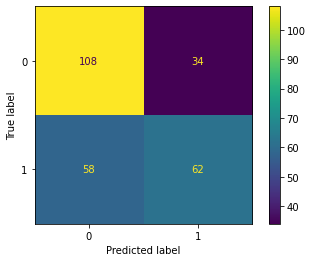

In [136]:
plot_confusion_matrix(model,X_test,Y_test);

In [137]:
print(classification_report(Y_test, Ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



In [138]:
### Applying GridSearchCV for Logistic Regression


grid={'penalty':['7','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [139]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [140]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [141]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['7', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [142]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag')


In [143]:
best_model = grid_search.best_estimator_

In [144]:
# Prediction on the training set

Ytrain_predict = best_model.predict(X_train)
Ytest_predict = best_model.predict(X_test)

In [145]:
## Getting the probabilities on the test set

Ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.525616,0.474384
1,0.555496,0.444504
2,0.530489,0.469511
3,0.546021,0.453979
4,0.568724,0.431276


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610
 



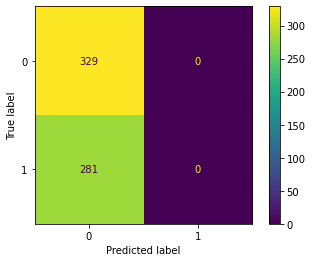

In [146]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,Y_train)
print(classification_report(Y_train, Ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262
 



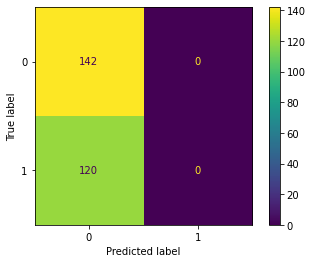

In [147]:
# Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,Y_test)
print(classification_report(Y_test, Ytest_predict),'\n');

Here after apply grid search Cv the model is overfitted so we go without the trunning parameters

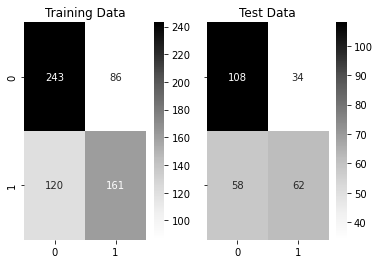

In [148]:
##Linear Discriminant Analysis Model Evaluation


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [149]:
## Training Data and Test Data Classification Report Comparison
clf = LinearDiscriminantAnalysis()

In [150]:
model1=clf.fit(X_train,Y_train)
model1

LinearDiscriminantAnalysis()

In [151]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



In [152]:
# Training Data Probability Prediction
pred_prob_train = model1.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model1.predict_proba(X_test)

In [153]:
pred_prob_train[:,1]

array([0.73381047, 0.28335139, 0.39602227, 0.75811139, 0.47077503,
       0.40288832, 0.36938597, 0.30429271, 0.60511549, 0.64331779,
       0.23236876, 0.25905352, 0.35870658, 0.04481746, 0.28052157,
       0.36436459, 0.54805152, 0.30607846, 0.58596151, 0.66087477,
       0.62864901, 0.26524013, 0.88183311, 0.3339946 , 0.08650304,
       0.82610447, 0.19401889, 0.75721542, 0.53138081, 0.1884556 ,
       0.29545808, 0.33809258, 0.3786442 , 0.3805076 , 0.31248766,
       0.29335095, 0.10970912, 0.56057784, 0.48145587, 0.19510252,
       0.22664102, 0.79936112, 0.5017598 , 0.73936151, 0.7906696 ,
       0.36957611, 0.30401273, 0.93317999, 0.43207603, 0.72243241,
       0.71571829, 0.45361505, 0.78697249, 0.3732299 , 0.19256563,
       0.74061067, 0.25056989, 0.51469343, 0.67344556, 0.35368416,
       0.61007438, 0.52767641, 0.52194835, 0.41031873, 0.56904209,
       0.61659997, 0.1237378 , 0.56414678, 0.40272604, 0.27648254,
       0.33165029, 0.74716143, 0.77838017, 0.21902504, 0.44569

AUC for the Training Data: 0.731
AUC for the Test Data: 0.714


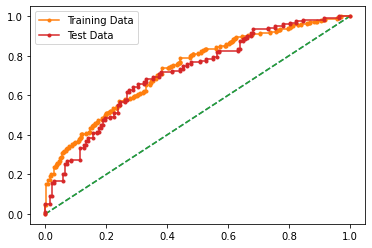

In [154]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

2.4 Inference: Basis on these predictions, what are the insights and recommendations.

0.1 

Accuracy Score 0.4738
F1 Score 0.6356 

Confusion Matrix


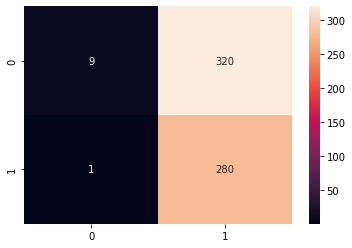

0.2 

Accuracy Score 0.523
F1 Score 0.6498 

Confusion Matrix


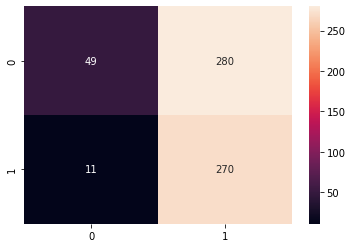

0.3 

Accuracy Score 0.6066
F1 Score 0.6774 

Confusion Matrix


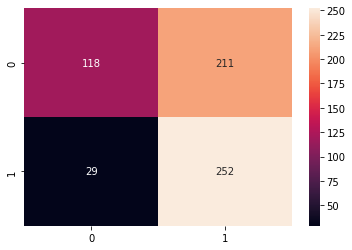

0.4 

Accuracy Score 0.6623
F1 Score 0.6677 

Confusion Matrix


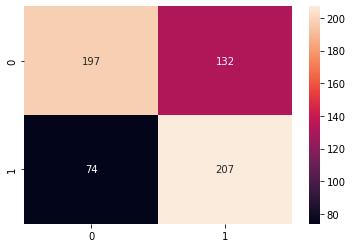

0.5 

Accuracy Score 0.6623
F1 Score 0.6098 

Confusion Matrix


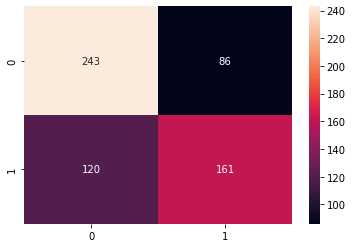

0.6 

Accuracy Score 0.6508
F1 Score 0.5192 

Confusion Matrix


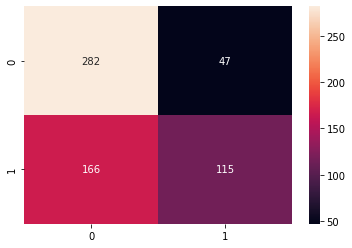

0.7 

Accuracy Score 0.6426
F1 Score 0.4263 

Confusion Matrix


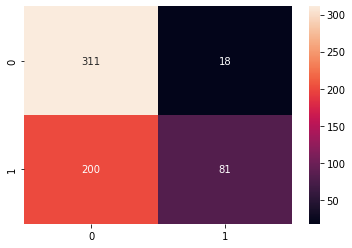

0.8 

Accuracy Score 0.5902
F1 Score 0.2038 

Confusion Matrix


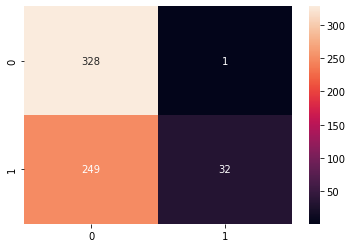

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


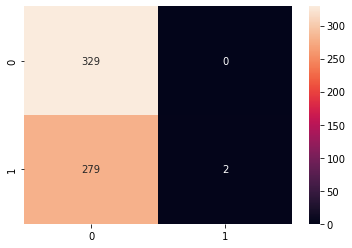

In [155]:
for j in np.arange(0.1,1,0.1):
    Holidaypackage_prob = j #defining the cut-off value of our choice
    Holidaypackage_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > Holidaypackage_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        Holidaypackage_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,Holidaypackage_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,Holidaypackage_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,Holidaypackage_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [156]:
#Predicting the classes on the test data

data_pred_Holidaypackage_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_Holidaypackage_cutoff.append(a)

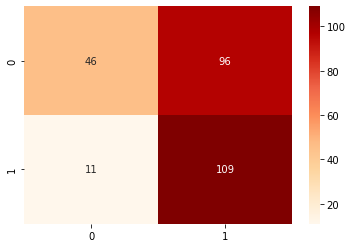

In [157]:
sns.heatmap((metrics.confusion_matrix(Y_test,data_pred_Holidaypackage_cutoff)),annot=True,fmt='.5g',cmap='OrRd');

In [158]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the Holidaypackage cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_Holidaypackage_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



Classification Report of the Holidaypackage cut-off test data:

               precision    recall  f1-score   support

           0       0.81      0.32      0.46       142
           1       0.53      0.91      0.67       120

    accuracy                           0.59       262
   macro avg       0.67      0.62      0.57       262
weighted avg       0.68      0.59      0.56       262
 



2.4 Inference: Basis on these predictions, what are the insights and recommendations.
In Logistic Regression Model we use the model without any turning parameters, while in LDA we will use model with turning parameters.

In Logistic Regression Model

For Opting Holiday Package [Label:1]

Precision (65%) - 65% of employees that are predicted are actually opting Holiday Package out of all the employees who are predicted to opted Holiday Package.

Recall (52%) – Out of all employee who are opting the holiday package 52% of employees are predicted correctly.

F1 score( 57%) – 57% data is between precision and recall

Overall accuracy of the model – 65 % of total predictions are correct.